In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from parameter_formatting import parameter_formatting
from parameter_formatting_WL import parameter_formatting_WL
from parameter_formatting_data import parameter_formatting_data

%matplotlib inline

In [2]:
#adding some constants
h = 6.62607004*(10**-34)
c = 2.99792458*(10**8)

responsivity = pd.read_csv("responsivity.csv")  #ratio of generated photocurrent to incident power (A/W)    
Ephoton = (h*c)/((responsivity.loc[:,"wavelength"])*10**-9)     #calculate the energy of photons (J)   

no_of_photons = responsivity.loc[:,"responsivity"]*Ephoton      #multiplying the energy of photon with the responsivity (A.s)
responsivity = pd.concat([responsivity, no_of_photons], axis = 1)     #adding the photons coloum to responsivity
responsivity.columns = ['wavelength', 'responsivity', 'no of photons(A.s)'] #renaming all the coloumn

In [3]:
#responsivity.loc[43] 

In [4]:
#responsivity.head()

In [5]:
#Ephoton[28] #28 is the index of 480nm

In [6]:
#responsivity.iloc[43:54,:] #responsivity at the wavelength of 630 nm

In [7]:
PDcal = parameter_formatting_WL("PDcal.csv")                                   #format the PDcal file as required

PowerCal = PDcal.loc[:, ['Wavelength(nm)','IS(A)', 'M(V)']]      #retreive data only at excitation wavelength (480nm)

PowerCal_1 = PowerCal['IS(A)']/PowerCal['M(V)']            #dividing IS(current at detector) by beam monitor

PowerCal = pd.concat([PowerCal, PowerCal_1], axis = 1)              #adding the new column to the powercal dataframe

PowerCal.columns = ['Wavelength(nm)','IS(A)','M(V)','ISbyM']                         #renaming all the columns

PowerCal = PowerCal.groupby(np.arange(len(PowerCal))//5).mean()    #taking mean of 5 values rowwise

#abs flux-total photons hitting the PD at 480nm ie 3,28. It is basically calculating the photon flux hitting the PD.
#It is done by simply dividing the current reading in the PD by no of photons. Also the current at PD is divided by beam monitor
# to standardize everything.
AFluxIn = PowerCal.loc[0,'ISbyM']/responsivity.loc[43, 'no of photons(A.s)'] # in (1/V.s)

In [8]:
#PowerCal.loc[0]

In [9]:
#AFluxIn

In [10]:
#responsivity[29:39]

In [11]:
#PowerCal

In [12]:
# References for Abs reflection

glass_SP = parameter_formatting("Glass_SP.csv")
r1 = glass_SP.loc[630,['R(V)','M(V)']]                  #retreive data only at excitation wavelength (630nm)
r2 = r1['R(V)']/r1['M(V)']/0.042
R = pd.concat([r1,r2], axis = 1)
R.columns = ['R(V)', 'M(V)', 'R by M']
R=R.mean(axis=0)

RrefI = R['R by M']                            #reflection at excitation wavelength ie. 630 nm

t1 = glass_SP.loc[630,['IS(A)','M(V)']]        #excitation wavelength indexes
t2 = t1['IS(A)']/r1['M(V)']/0.93
T = pd.concat([t1,t2], axis = 1)
T.columns = ['IS(A)', 'M(V)', 'IS by M']
T=T.mean(axis=0)

Tglass = T['IS by M']

BrefI = (glass_SP.loc[630,['M(V)']]).mean(axis=0)         #beam monitor reference at excitation wavelength (480nm)

In [13]:
#AFluxIn

In [14]:
#BrefI

In [15]:
#RrefI

In [16]:
#Tglass

In [17]:
# References for PL reflection

glass_LP = parameter_formatting("Glass_LP.csv")

g1 = glass_LP.loc[:,"R(V)"]/glass_LP.loc[:,"M(V)"]      #division of RV by MV
RrefPL = g1.groupby(np.arange(len(g1))//5).mean()       #taking mean of 5 values rowwise

g2 = glass_LP.loc[:,"IS(A)"]/glass_LP.loc[:,"M(V)"]
ISrefPL = g2.groupby(np.arange(len(g2))//5).mean()

g3 = glass_LP.loc[:,["Wavelength(nm)","M(V)"]]
BrefPL = g3.groupby(np.arange(len(g3))//5).mean()

#3:10 and 46:53 are the Pl WL 660 to 730
PLFluxIn = (PowerCal.loc[3:10,"ISbyM"].mean())/(responsivity.loc[46:53,'no of photons(A.s)'].mean()) #Photon per voltBM

#3:10 is 660 to 730
RPLEff = (0.04*PLFluxIn)/(RrefPL.loc[3:10].mean()) #Photons per voltR

In [18]:
#responsivity.loc[43:53]

In [19]:
# Reference for miss (transmission)

miss_SP = parameter_formatting_WL("miss_SP.csv")
WL1 = miss_SP.loc[:,'Wavelength(nm)'].groupby(np.arange(len(miss_SP.loc[:,'Wavelength(nm)']))//5).mean() #index for WL

ISmiss1 = (miss_SP.loc[:,'IS(A)']/miss_SP.loc[:,'M(V)'])
ISmiss_a = ISmiss1.groupby(np.arange(len(ISmiss1))//5).mean()       #taking mean of 5 values rowwise

ISrefI = ISmiss_a[0] #transmission at excitation ie 630nm ie 0

In [20]:
#RrefPL

In [21]:
#WL1

In [22]:
miss_LP = parameter_formatting_WL("miss_LP.csv")

WL2 = miss_LP.loc[:,'Wavelength(nm)'].groupby(np.arange(len(miss_LP.loc[:,'Wavelength(nm)']))//5).mean() #index for WL

ISmiss2 = (miss_LP.loc[:,'IS(A)']/miss_SP.loc[:,'M(V)'])
ISmiss_b = ISmiss2.groupby(np.arange(len(ISmiss2))//5).mean()       #taking mean of 5 values rowwise

ISPLEff = PLFluxIn/(ISmiss_b.loc[3:10].mean())  #Pl wavelength index from 660 to 730.

In [23]:
#WL2

In [24]:
#Measured Data
X = 37 # no of steps in x = difference of x co-ordinates times 2 plus 1
Y = 19 # no of steps in y = difference of x co-ordinates times 2 plus 1


In [25]:
#Absorption
data1 = parameter_formatting_data("pos1_9x18um_SP.csv")

RI = (data1.loc[:,'Ref(V)']/data1.loc[:,'M(V)'])

ISI = data1.loc[:,'IS(A)']/data1.loc[:,'M(V)']

BI = data1.loc[:,'M(V)']

BmeanI = BI.mean()

#In this line the original data is formatted as a matrix of columns but I have a series as of now.
A = 1 - ISI/ISrefI - RI/RrefI  #-0.03 (didn't understand properly what is this?)

In [26]:
#BmeanI

In [27]:
#A

In [28]:
#PL

data2 = parameter_formatting_data("pos1_9x18um_LP.csv")

BPL = data2.loc[:,'M(V)']

RPL = data2.loc[:,'Ref(V)']               #/data2.loc[:,'M(V)']   #-(1-A).*RBGPL.*BPL

ISPL = data2.loc[:,'IS(A)']               #/data1.loc[:,'M(V)']  #%-(1-A).*ISBGPL.*BPL

In [29]:
AbsFlux = (AFluxIn*A)*BmeanI

In [30]:
type(AbsFlux)

pandas.core.series.Series

In [31]:
FluxOut = RPL*RPLEff + ISPL*ISPLEff

In [32]:
PLQY = (FluxOut/AbsFlux)*100

Text(0.5,1,'Absorption Flux')

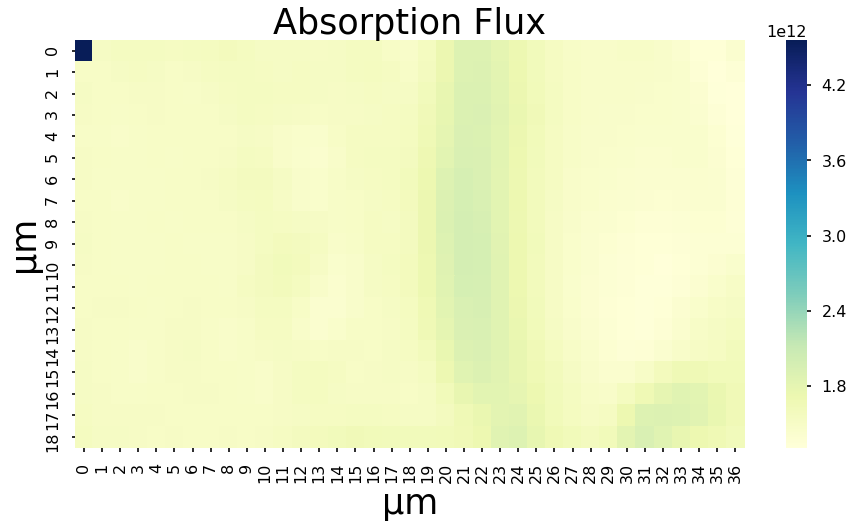

In [35]:
#plotting the absorption heatmap
AbsFlux = AbsFlux.reshape((Y,X)) #put rows, columns
sns.set_context("poster")
plt.figure(figsize=(15,7.5))
sns.heatmap(AbsFlux, cmap = "YlGnBu", annot=False,) #linewidths=1
plt.xlabel("µm", size = 35)
plt.ylabel("µm", size = 35)
plt.title("Absorption Flux", size = 35)
#plt.savefig("U:\\Results\\Quantum yield setup from Sander\\1. 180218_test\\Absorption.png", dpi = 300)

Text(0.5,1,'Emission Flux')

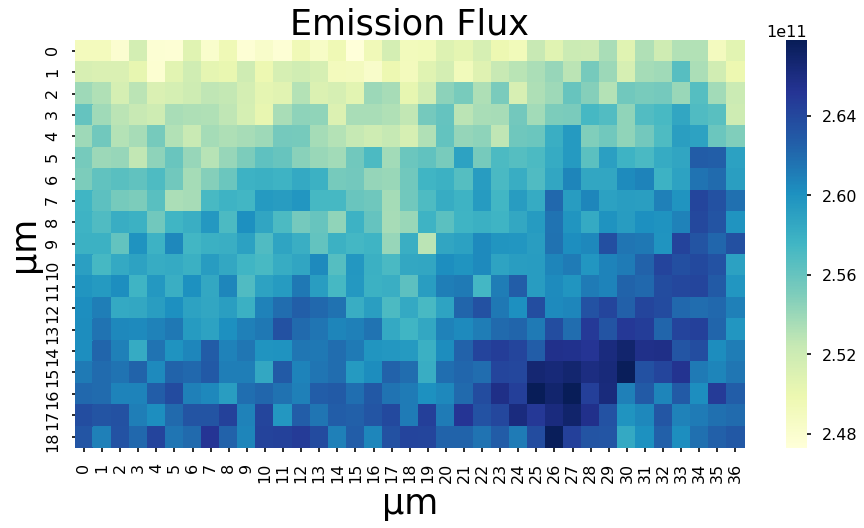

In [36]:
#plotting the PL heatmap

FluxOut = FluxOut.reshape((Y,X)) #put rows, columns
sns.set_context("poster")
plt.figure(figsize=(15,7.5))
sns.heatmap(FluxOut, cmap = "YlGnBu", annot=False,)# linewidths=0.1 )
plt.xlabel("µm", size = 35)
plt.ylabel("µm", size = 35)
plt.title("Emission Flux", size = 35)
#plt.savefig("U:\\Results\\Quantum yield setup from Sander\\1. 180218_test\\Emission.png", dpi = 300)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'External PLQY')

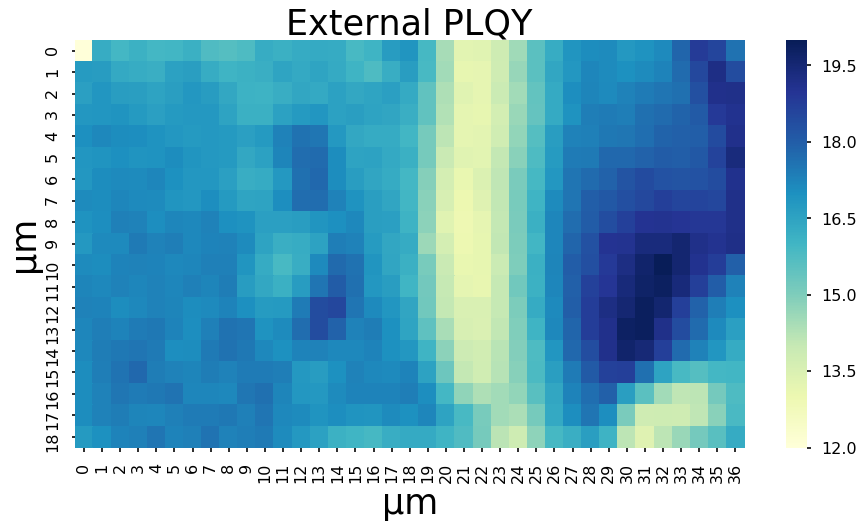

In [37]:
#plotting the External PLQY heatmap

PLQY = PLQY.reshape((Y,X)) #put rows, columns
sns.set_context("poster")
plt.figure(figsize=(15,7.5))
sns.heatmap(PLQY, cmap = "YlGnBu", annot=False, vmin = 12, vmax=20,)# linewidths=0.1)
plt.xlabel("µm", size = 35)
plt.ylabel("µm", size = 35)
plt.title("External PLQY", size = 35)
#plt.savefig("U:\\Results\\Quantum yield setup from Sander\\1. 180218_test\\External PLQY.png", dpi = 300)